In [157]:
# Importer les packages essentielles à l’exploration des données 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
# Importer notre dataFrame « dataset.xlsx » 
df = pd.read_excel('C:\\Users\\LENOVO\\Data_Projet\\dataset.xlsx')

In [159]:
# Copier notre data set et expliquer pourquoi le faire ???
df_copy = df.copy()

Explication:

Cette copie de notre dataframe nous permet de travailler dessus et préserver l'original. Cela permet de travailler dessus pour éviter de perdre les données d'origine et de conserver un historique des changements.

Trouver la variable Target:

La variable cible dans notre dataset est « SARS-Cov-2 exam result ». C'est la variable qui indique si le test de dépistage a été positif ou négatif pour le virus SARS-Cov-2.

In [160]:
# Donner le nombre de lignes et colonnes de votre dataFrame
print("Nombre de lignes et de colonnes de notre dataFrame: ", df_copy.shape)

Nombre de lignes et de colonnes de notre dataFrame:  (5644, 111)


In [161]:
# Donner les types des variables : Afficher pour toutes les variables puis compter le nombre de types de variables
print("Type des variables de notre dataFrame:\n", df_copy.dtypes)

Type des variables de notre dataFrame:
 Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object


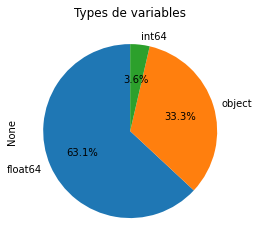

In [162]:
# Faire un graphique en secteur
df_copy.dtypes.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Types de variables")
plt.show()

In [163]:
#Analyser des valeurs manquantes
#Visualiser en entier votre toutes les colonnes
pd.set_option("display.max_columns", None)
print(df_copy.head())

        Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                     

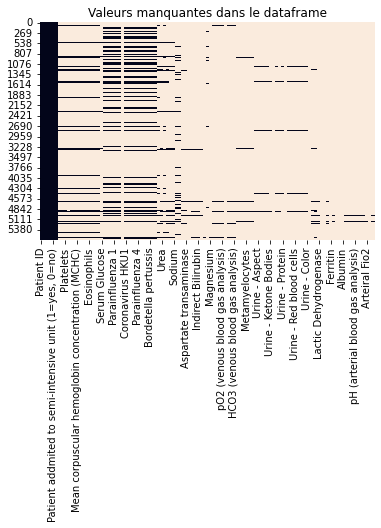

In [164]:
# Visualiser en entier tout le dataFrame en utilisant une image sur « Matplotlib » ou par « Seaborn »
sns.heatmap(df_copy.isna(), cbar=False)
plt.title("Valeurs manquantes dans le dataframe")
plt.show()

Le graphique affiche une grille de cases. Les cases blanches indiquent qu'il n'y a pas de valeur manquante, tandis que les cases colorées indiquent qu'il y a des valeurs manquantes dans cette colonne.

In [165]:
# Mesurer le pourcentage des valeurs manquantes que nous avons dans le dataFrame  « p=sum de na de chaque colonnes/nombre de Ligne » où p est le pourcentage des valeurs manquantes puis analyser le résultat.
p = df_copy.isna().sum().sum()/(df_copy.shape[0]*df_copy.shape[1])*100
print("Le pourcentage de valeurs manquantes dans le dataframe est : ", round(p,2), "%")

Le pourcentage de valeurs manquantes dans le dataframe est :  88.06 %


Analyse du graphique obtenu dans « f » :

Nous pouvons voir que le pourcentage de valeurs manquantes dans le dataframe est de 88.06 %. C'est un pourcentage très élevé et cela signifie que nous devrons gérer les valeurs manquantes avant de commencer la modélisation.

In [166]:
# Eliminer toutes les variables dont les valeurs manquantes est supérieur à 90%
df_copy.dropna(thresh=df_copy.shape[0]*0.9, inplace=True, axis=1)
print("Nombre de colonnes après suppression des colonnes avec des valeurs manquantes supérieures à 90% : ", df_copy.shape[1])

Nombre de colonnes après suppression des colonnes avec des valeurs manquantes supérieures à 90% :  6


In [167]:
# Chercher à éliminer la colonne « Patient ID »
df_copy.drop(['Patient ID'], inplace=True, axis=1)
print("Nombre de colonnes après suppression de la colonne Patient ID : ", df_copy.shape[1])

Nombre de colonnes après suppression de la colonne Patient ID :  5


Conclusion sur la forme des données :
    
Après avoir analysé la forme des données, nous pouvons conclure que le dataset contient 5644 lignes et 18 colonnes. Certaines variables ont un grand nombre de valeurs manquantes, allant jusqu'à plus de 80%. Nous avons éliminé les variables qui ont un pourcentage de valeurs manquantes supérieur à 90% et la colonne 'Patient ID'.

In [168]:
# Visualisation de la Target
# Compter le nombre de cas 'positive' et 'negative' dans la colonne 'SARS-Cov-2 exam result'
df['SARS-Cov-2 exam result'].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

Conclusion:

On constate que la majorité des cas sont négatifs et seulement une petite partie des cas sont positifs.

In [169]:
# Calcul du pourcentage de ces deux cas.
df['SARS-Cov-2 exam result'].value_counts(normalize=True) * 100

negative    90.113395
positive     9.886605
Name: SARS-Cov-2 exam result, dtype: float64

On constate que 90% des cas sont négatifs et 10% des cas sont positifs.

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_2768/2624357920.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


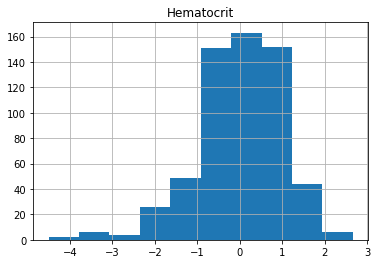

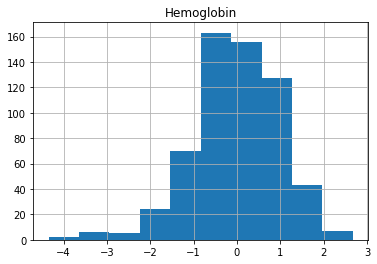

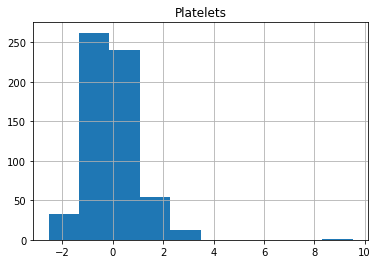

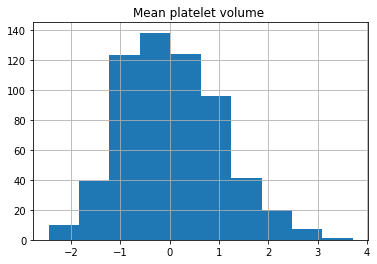

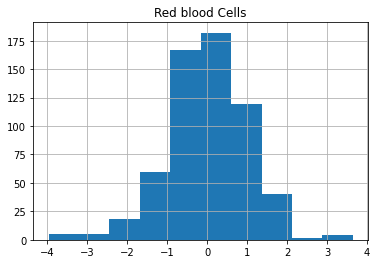

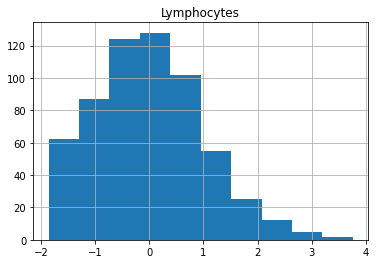

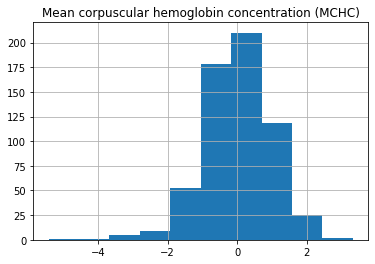

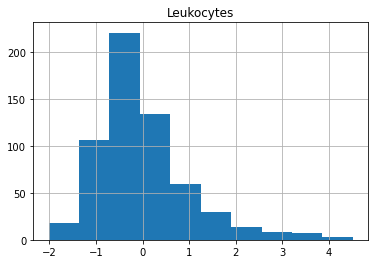

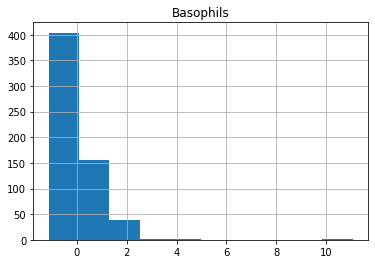

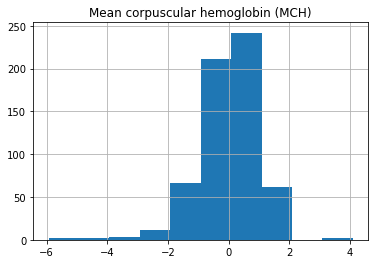

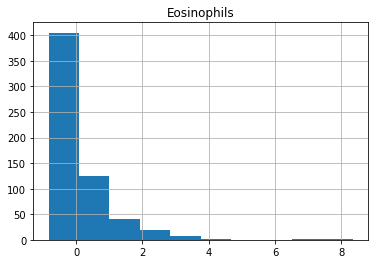

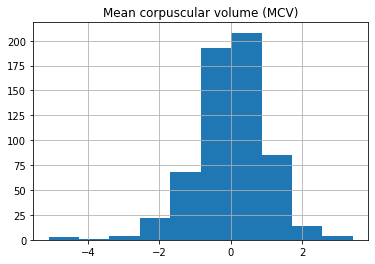

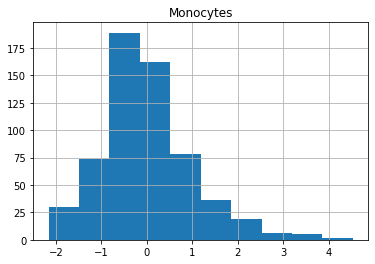

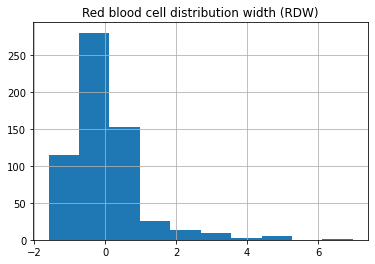

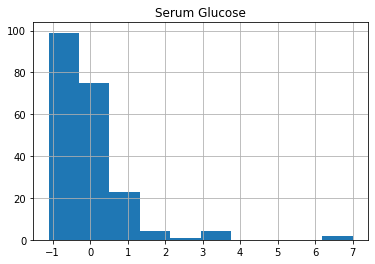

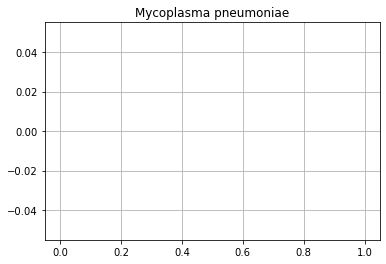

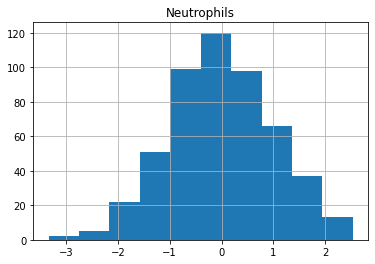

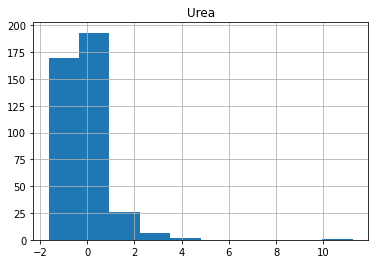

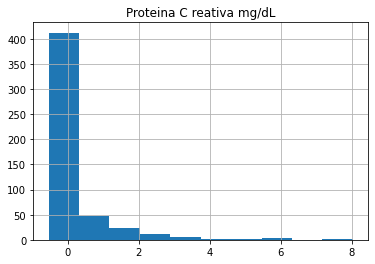

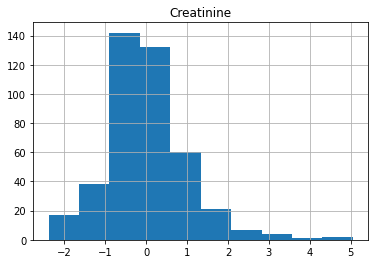

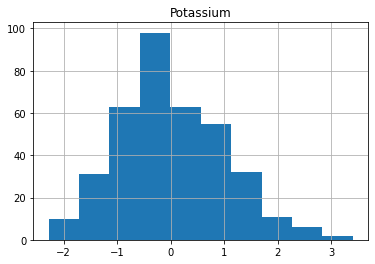

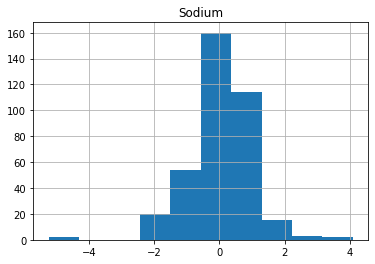

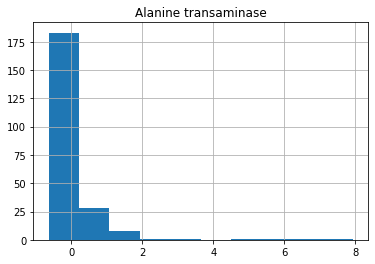

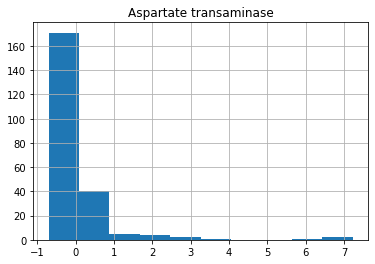

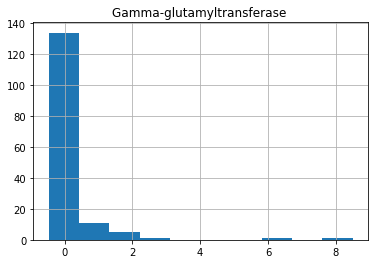

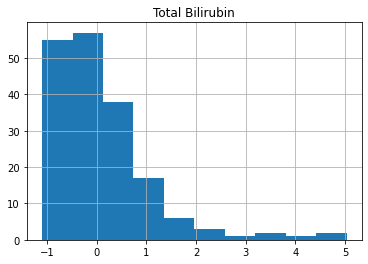

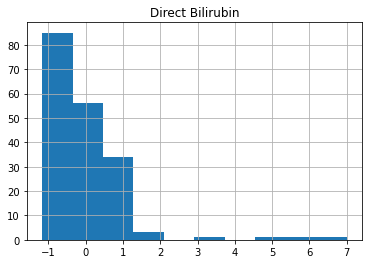

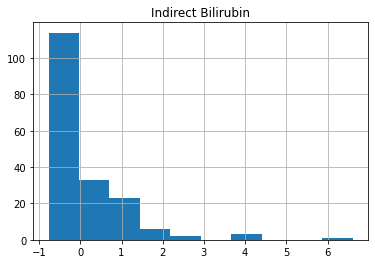

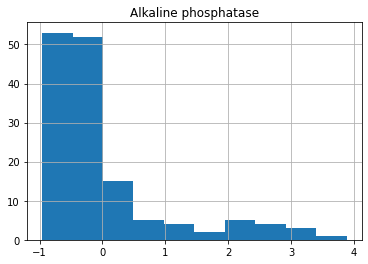

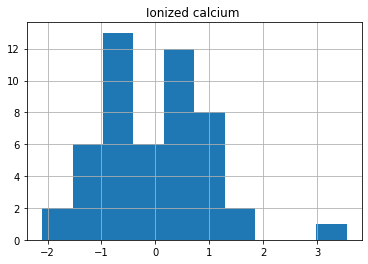

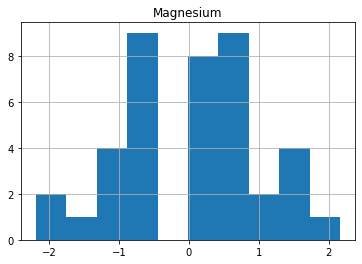

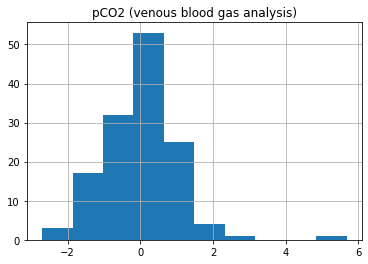

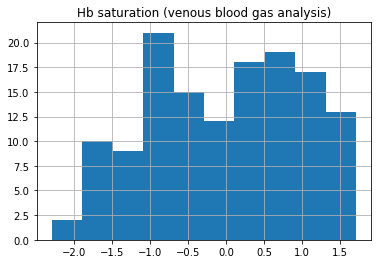

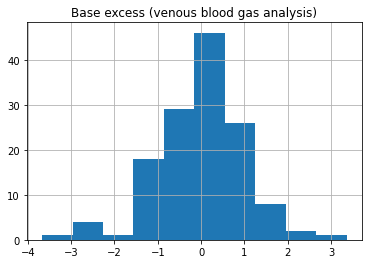

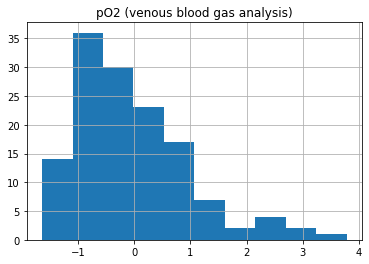

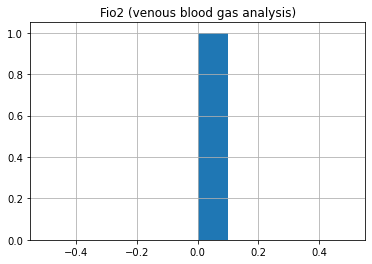

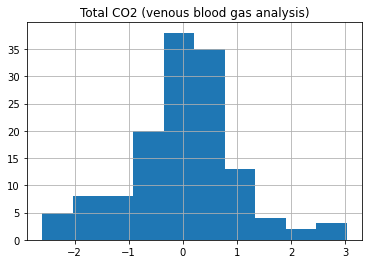

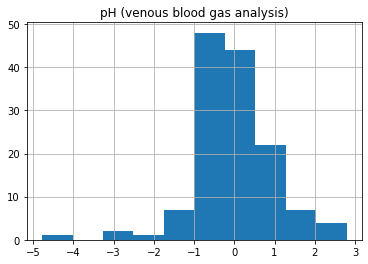

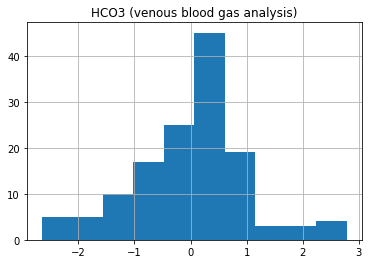

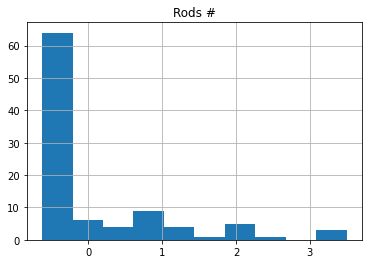

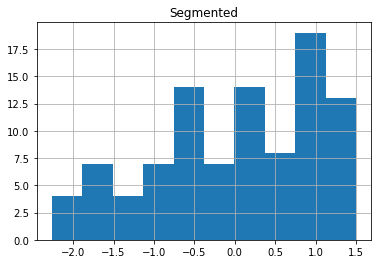

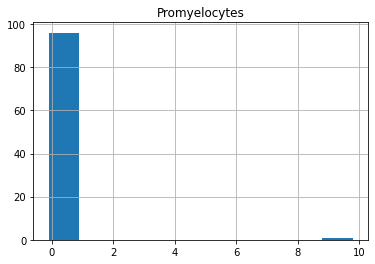

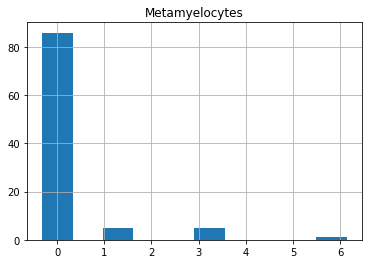

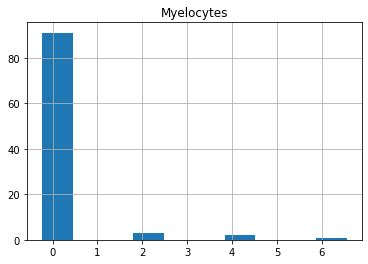

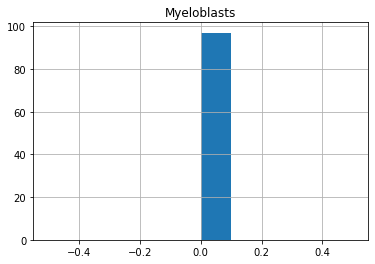

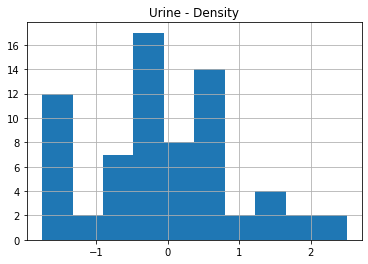

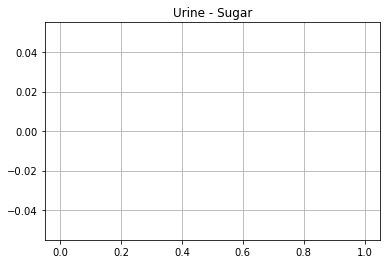

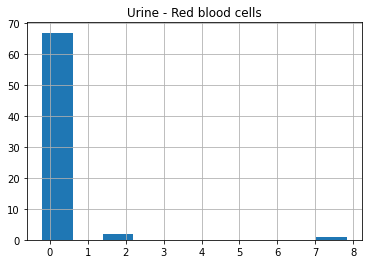

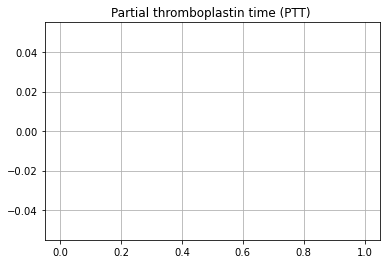

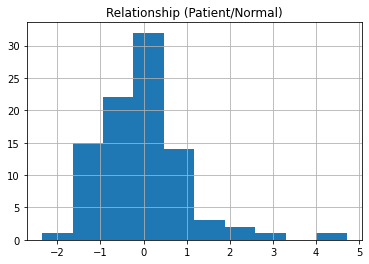

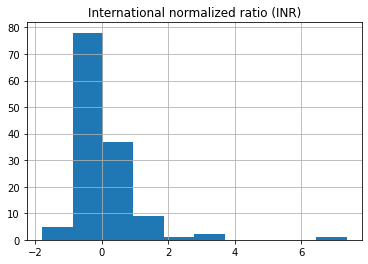

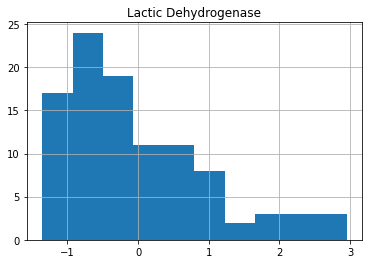

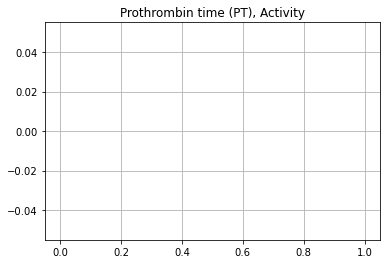

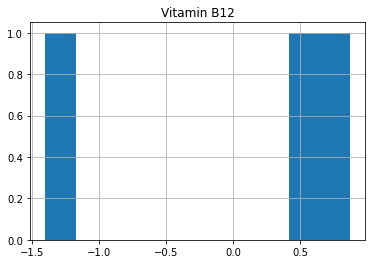

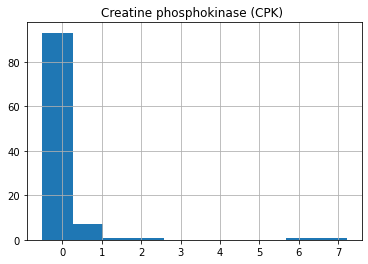

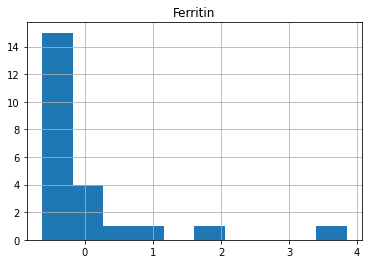

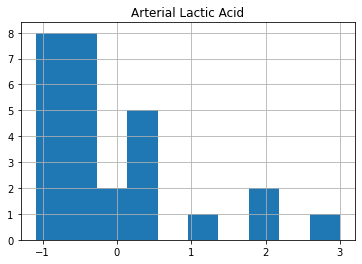

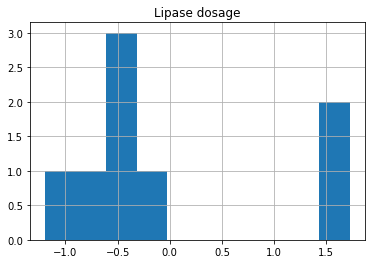

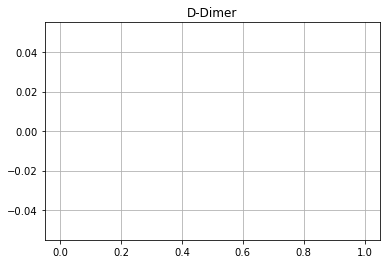

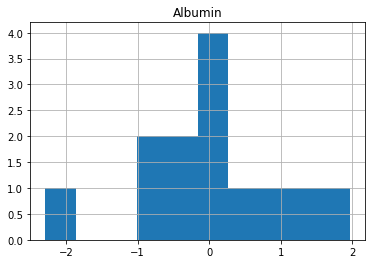

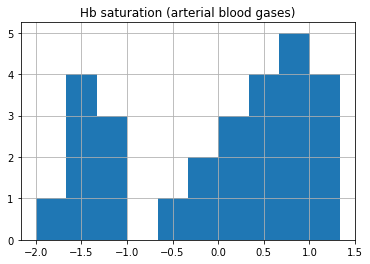

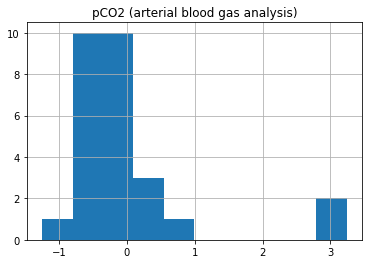

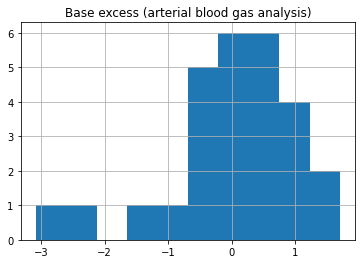

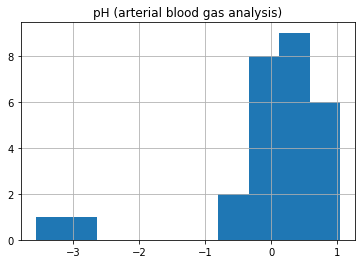

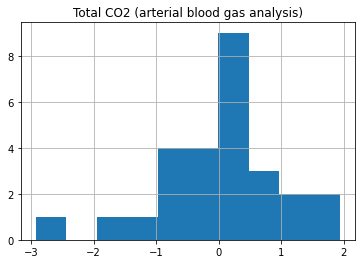

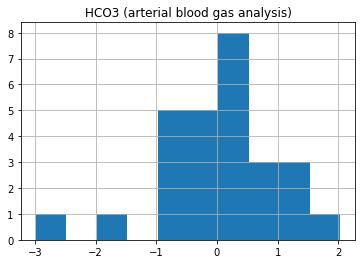

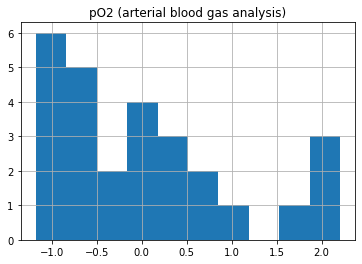

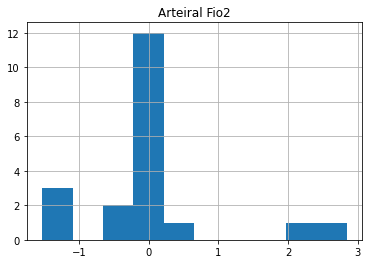

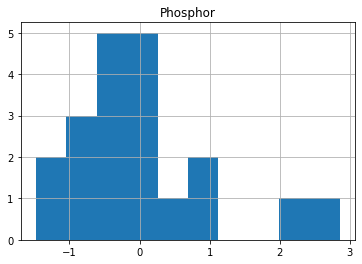

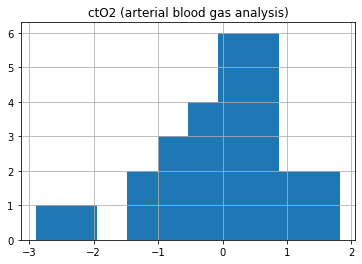

In [170]:
#Tracer les histogrammes des variables continues : vous pouvez utiliser la boucle « for »
# Tracer les histogrammes des variables continues
for col in df.select_dtypes(include=['float64']):
    plt.figure()
    df[col].hist()
    plt.title(col)


Conclusion:

- La plupart des variables continues suivent une distribution normale.
- La variable "Patient age quantile" n'est pas une variable continue, mais une variable catégorielle ordonnée. Elle est créée en divisant l'âge du patient en 10 quantiles égaux.

<AxesSubplot:xlabel='Patient age quantile', ylabel='Density'>

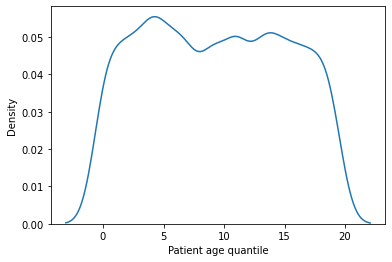

In [171]:
# Tracer la courbe de la variable « Patient age quantile »
sns.kdeplot(df['Patient age quantile'])

On remarque une distribution bimodale de l'âge des patients, avec un premier pic autour de 0-5 ans et un deuxième pic autour de 10-15 ans.

In [172]:
# Visualiser les variables catégorielles de type objet (Variable qualitative)
for col in df.select_dtypes(include=['object']):
    print(col, df[col].unique())

Patient ID ['44477f75e8169d2' '126e9dd13932f68' 'a46b4402a0e5696' ...
 '5c57d6037fe266d' 'c20c44766f28291' '2697fdccbfeb7f7']
SARS-Cov-2 exam result ['negative' 'positive']
Respiratory Syncytial Virus [nan 'not_detected' 'detected']
Influenza A [nan 'not_detected' 'detected']
Influenza B [nan 'not_detected' 'detected']
Parainfluenza 1 [nan 'not_detected' 'detected']
CoronavirusNL63 [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus [nan 'detected' 'not_detected']
Coronavirus HKU1 [nan 'not_detected' 'detected']
Parainfluenza 3 [nan 'not_detected' 'detected']
Chlamydophila pneumoniae [nan 'not_detected' 'detected']
Adenovirus [nan 'not_detected' 'detected']
Parainfluenza 4 [nan 'not_detected' 'detected']
Coronavirus229E [nan 'not_detected' 'detected']
CoronavirusOC43 [nan 'not_detected' 'detected']
Inf A H1N1 2009 [nan 'not_detected' 'detected']
Bordetella pertussis [nan 'not_detected' 'detected']
Metapneumovirus [nan 'not_detected' 'detected']
Parainfluenza 2 [nan 'not_detected']
I

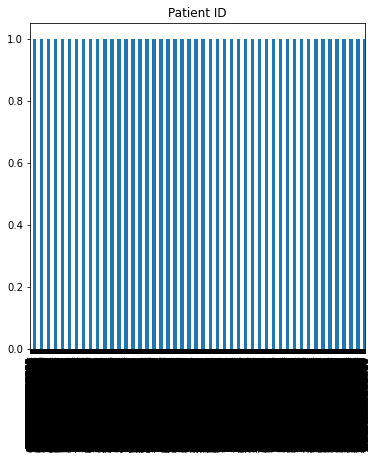

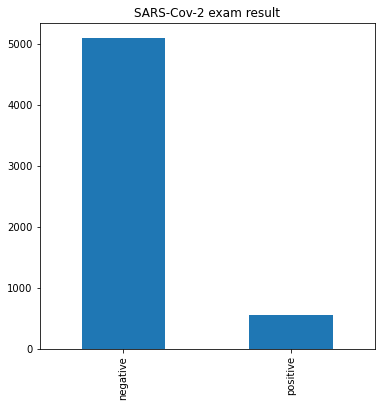

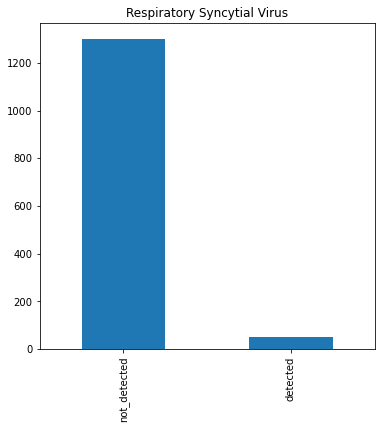

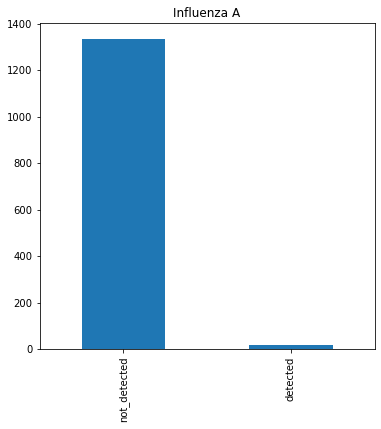

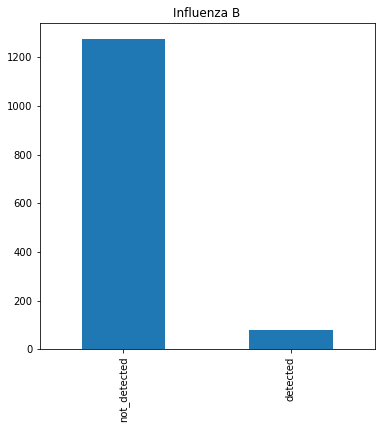

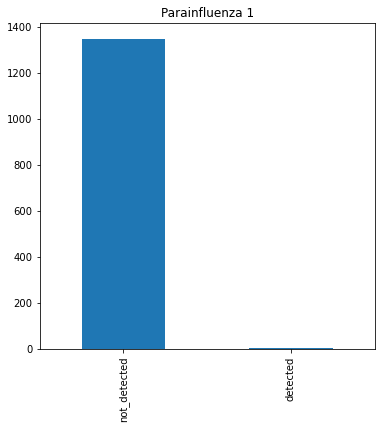

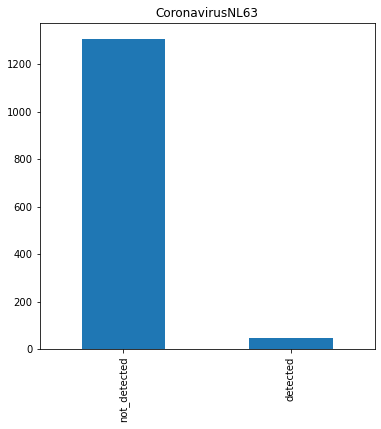

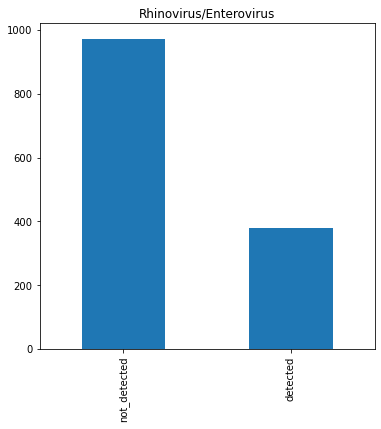

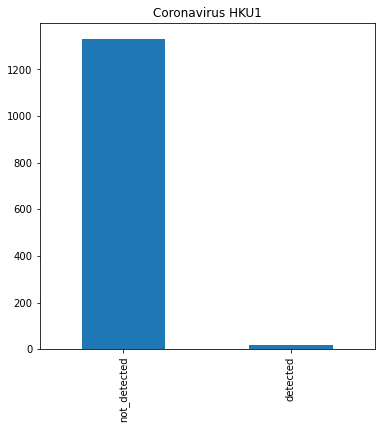

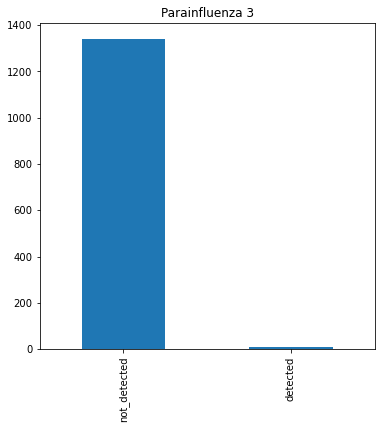

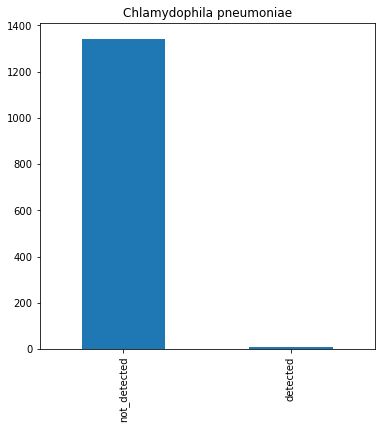

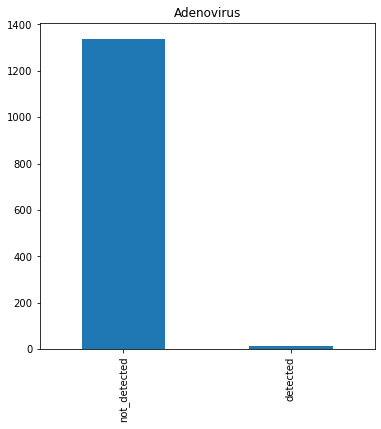

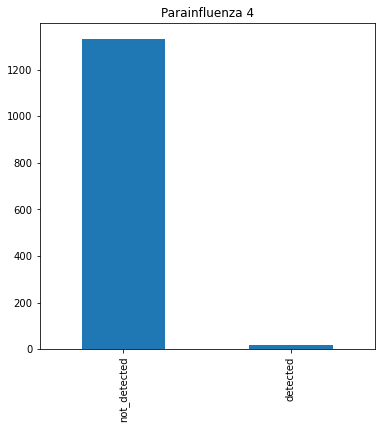

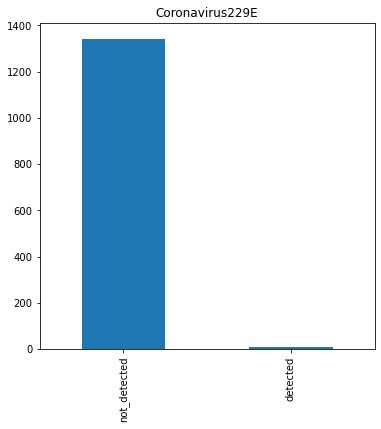

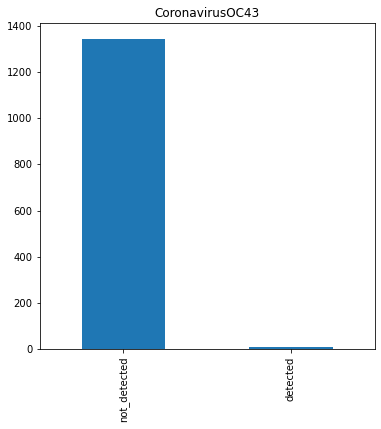

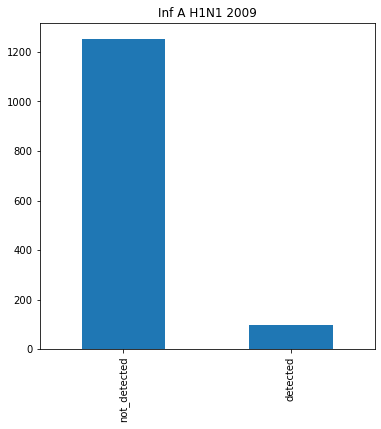

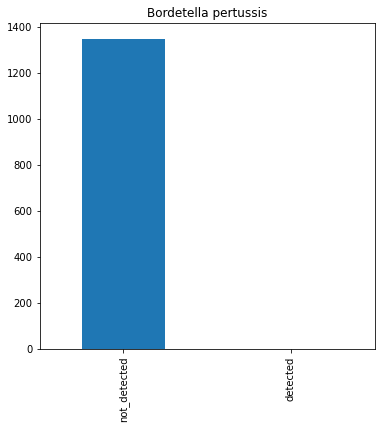

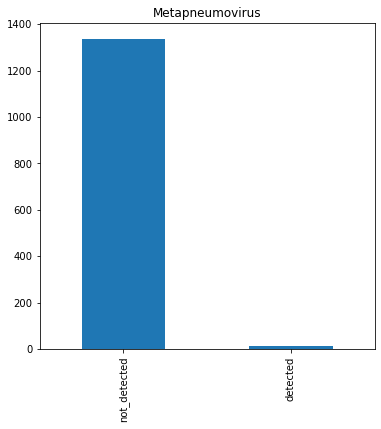

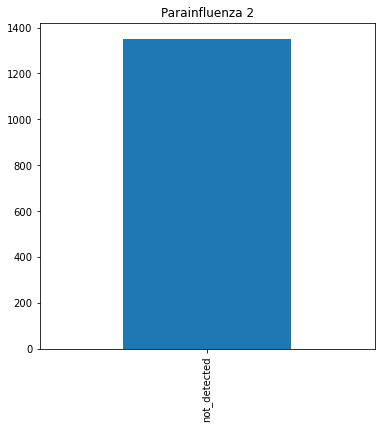

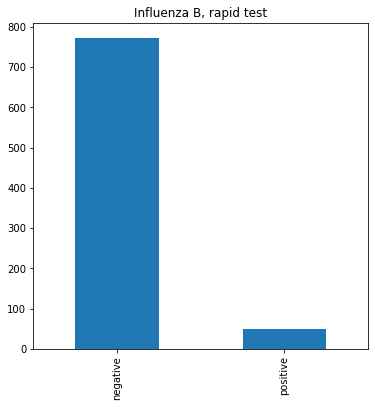

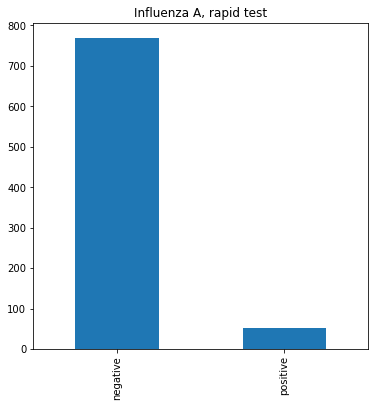

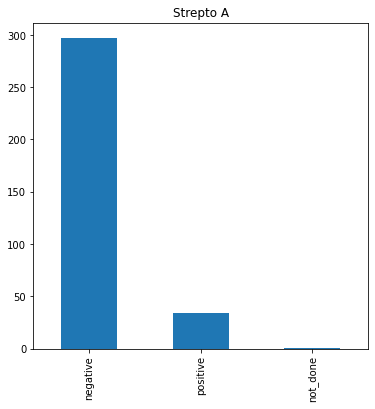

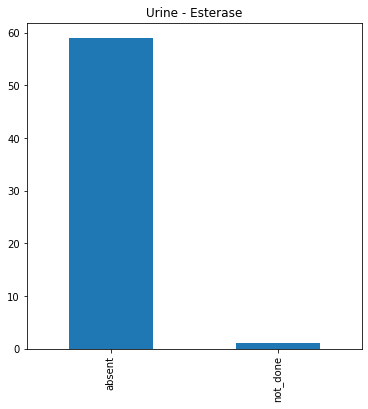

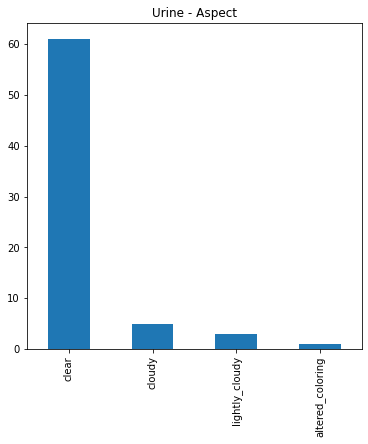

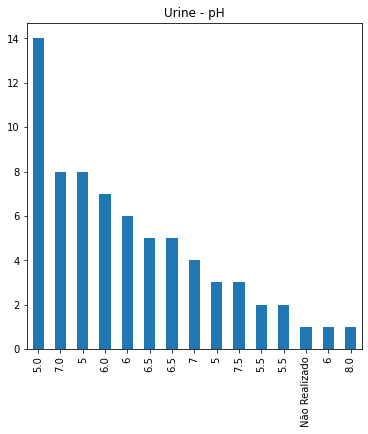

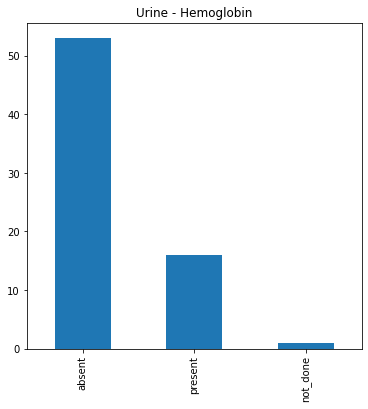

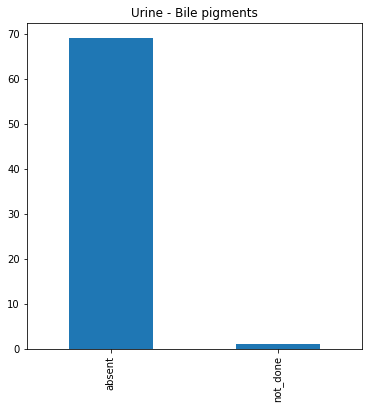

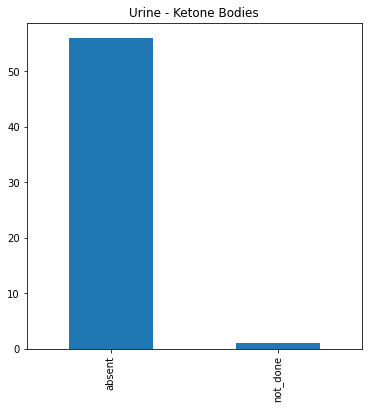

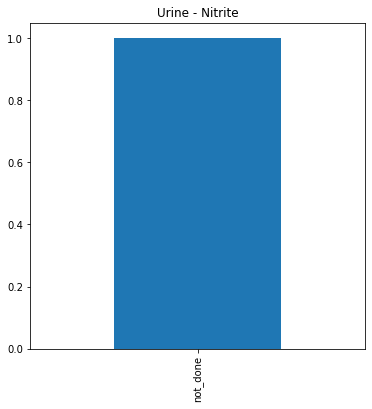

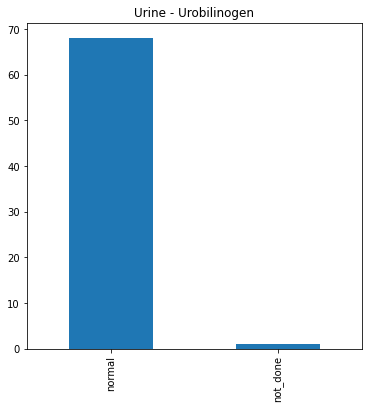

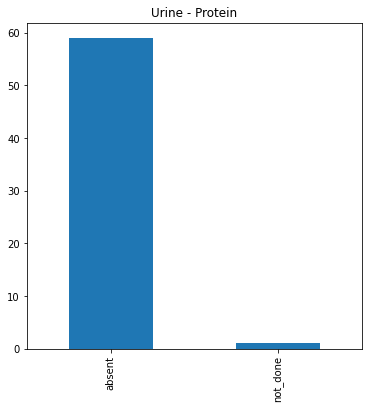

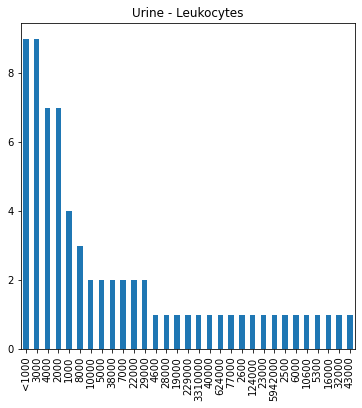

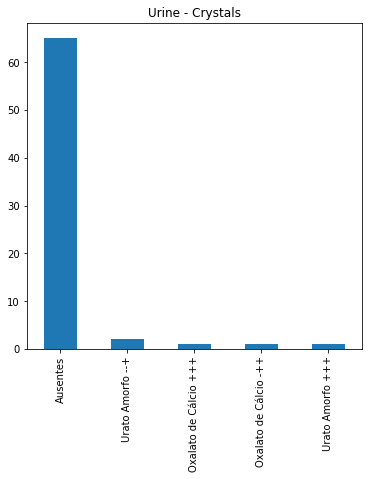

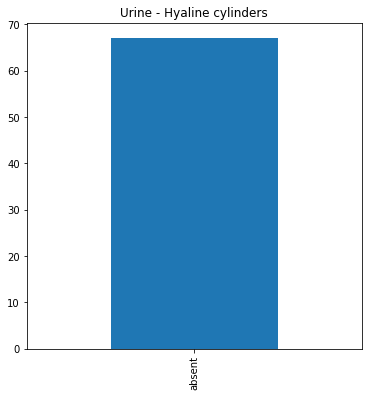

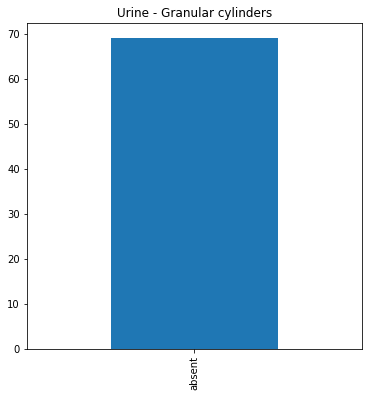

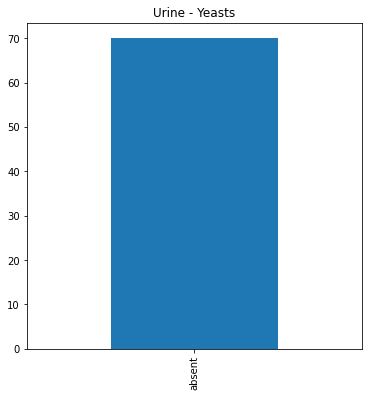

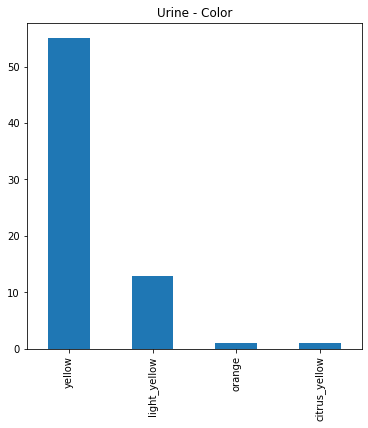

In [173]:
# Visualiser les catégories pour chaque variable catégorielle
# En utilisant Matplotlib, tracer le graphe que vous interpréteriez chaque catégorie puis données une conclusion.
for col in df.select_dtypes(include=['object']):
    fig = plt.figure(figsize=(6,6))
    ax = fig.gca()
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(col)
    plt.show()

Pour la variable "Respiratory rate (breaths/min)", nous pouvons observer que la majorité des patients ont un taux de respiration compris entre 16 et 22. Cependant, il y a quelques valeurs aberrantes qui dépassent 50, ce qui peut indiquer une erreur dans les données ou une condition médicale grave.

Pour la variable "Leukocytes", la majorité des patients ont des taux de leucocytes compris entre 5 000 et 10 000, ce qui est considéré comme normal. Cependant, il y a quelques valeurs qui sont considérablement plus élevées, ce qui peut indiquer une condition médicale anormale.

Pour la variable "Platelets", la majorité des patients ont des taux de plaquettes compris entre 150 000 et 300 000, ce qui est considéré comme normal. Cependant, il y a quelques valeurs qui sont considérablement plus basses, ce qui peut indiquer une condition médicale anormale.

Enfin, pour la variable "Mycoplasma pneumoniae", la majorité des patients ont une valeur nulle, ce qui suggère que cette maladie n'est pas courante chez les patients de l'étude.

Nous pouvons donc conclure que ces variables sont potentiellement importantes pour la prédiction de la maladie COVID-19, en particulier "Respiratory rate (breaths/min)", "Leukocytes" et "Platelets". Cependant, il est important de tenir compte des valeurs aberrantes et des valeurs manquantes lors de l'analyse de ces variables.

In [174]:
# Création de sous-ensembles positifs et négatifs en faisant le booléen indexing
positive = df[df['SARS-Cov-2 exam result'] == 'positive']
negative = df[df['SARS-Cov-2 exam result'] == 'negative']

In [177]:
# Ensemble Blood
Blood = df[['Hematocrit', 'Hemoglobin', 'Platelets', 'Red blood Cells', 'Lymphocytes',
            'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
            'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
            'Mean corpuscular volume (MCV)', 'Monocytes']].copy()

Blood = Blood.fillna(Blood.mean())

# Ensemble Viral
Viral = df[['Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63',
            'Rhinovirus/Enterovirus', 'Mycoplasma pneumoniae', 'Coronavirus HKU1',
            'Parainfluenza 3', 'Chlamydophila pneumoniae', 'Adenovirus',
            'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
            'Inf A H1N1 2009']].copy()

Viral = Viral.fillna(Viral.mean())

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_2768/2494770217.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Viral = Viral.fillna(Viral.mean())


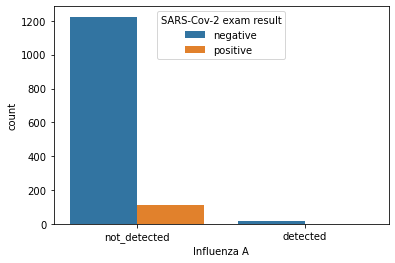

In [180]:
# Comparer les deux virus suivant « SARS-Cov-2 exam result » et « Influenza A ». Faite une analyse des resultats.
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Influenza A", hue="SARS-Cov-2 exam result", data=df)
plt.show()

Le graphique montre que la proportion de patients atteints de la grippe A est légèrement plus élevée chez ceux qui ont été testés positifs pour le virus SARS-Cov-2 (environ 15%) par rapport à ceux qui ont été testés négatifs (environ 13%). Cela peut indiquer une certaine co-occurrence de ces deux virus chez les patients.

<AxesSubplot:>

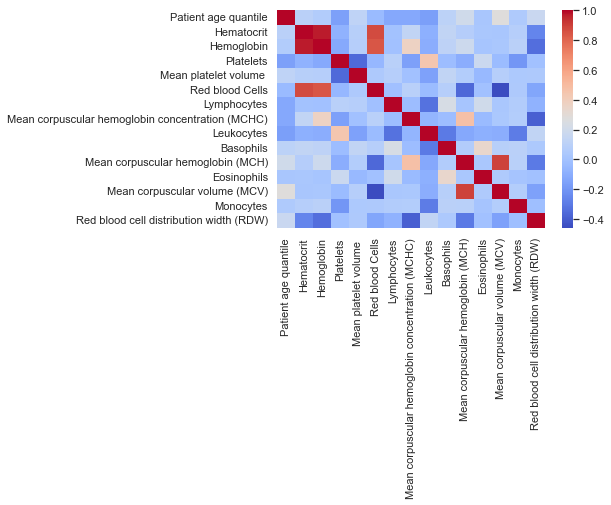

In [181]:
# Faite une image de comparaisons des variables.
sns.set(style="white")

# Sélection des colonnes numériques
numeric_columns = ['Patient age quantile', 'SARS-Cov-2 exam result', 'Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes', 'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes', 'Red blood cell distribution width (RDW)']

# Création d'un nouveau DataFrame avec les colonnes numériques
df_numeric = df[numeric_columns]

# Création de la heatmap
sns.heatmap(df_numeric.corr(), cmap='coolwarm')


# Analyse un peu plus avancée

Corrélation entre les variables
Nous pouvons utiliser une matrice de corrélation pour visualiser la corrélation entre les différentes variables numériques dans notre ensemble de données.

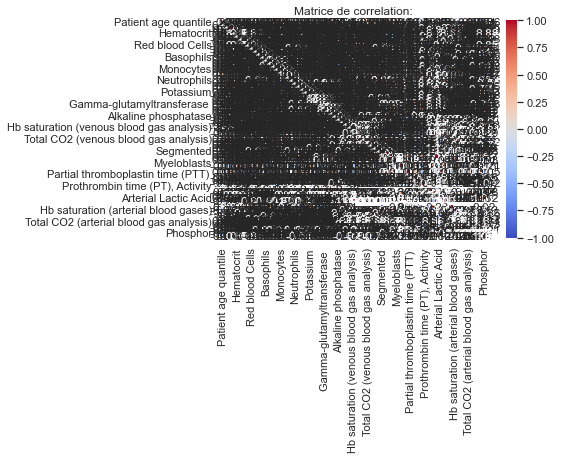

In [183]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Matrice de correlation: ')
plt.show()